In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\uugan\AppData\Local\Temp\ipykernel_15100\2912163957.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\uugan\AppData\Local\Temp\ipykernel_15100\2912163957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [10]:
#Part 1
columns = dfLE.columns.tolist()
# add the new column name to the list correctly
columns.append("GDP_per_capita")
dfLE["GDP_per_capita"] = dfLE["GDP"] / dfLE["Population"]
dfLE = dfLE[columns]
dfLE.sample(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,...,Diphtheria,GDP,Population,Schooling,GDP_per_capita,GDP_per_capita,GDP_per_capita,GDP_per_capita,GDP_per_capita,GDP_per_capita
97,Lithuania,1.0,72.80625,117.2500,0.0000,12.632667,94.750000,14.9375,49.23125,0.0000,...,94.2500,1.965220e+10,1.926212e+06,16.10000,10202.508623,10202.508623,10202.508623,10202.508623,10202.508623,10202.508623
12,Bangladesh,0.0,69.30000,141.3750,153.6250,0.010000,77.615385,4649.9375,12.87500,201.5625,...,92.7500,2.568747e+10,4.298516e+07,8.69375,597.589176,597.589176,597.589176,597.589176,597.589176,597.589176
166,SyrianArabRepublic,0.0,70.85000,139.6250,8.0000,0.804667,64.125000,295.6875,47.31250,9.5625,...,48.4375,6.753268e+09,6.741445e+06,10.98125,1001.753752,1001.753752,1001.753752,1001.753752,1001.753752,1001.753752
74,Hungary,1.0,73.82500,147.0625,0.5625,11.427333,NaN,2.0625,56.93125,0.8750,...,99.0000,1.287278e+10,1.604902e+06,15.11875,8020.910601,8020.910601,8020.910601,8020.910601,8020.910601,8020.910601
39,CostaRica,0.0,78.59375,69.3750,1.0000,3.924667,79.312500,0.1875,46.72500,1.0000,...,79.7500,7.918350e+09,2.309299e+06,12.83750,3428.897125,3428.897125,3428.897125,3428.897125,3428.897125,3428.897125
102,Maldives,0.0,75.53750,83.1875,0.0000,1.407333,97.875000,157.8750,19.29375,0.0000,...,97.8750,2.674117e+07,3.334250e+03,12.00000,8020.146375,8020.146375,8020.146375,8020.146375,8020.146375,8020.146375
119,NewZealand,1.0,81.33750,71.5000,0.0000,9.166250,70.187500,94.9375,56.62500,0.0000,...,70.6250,0.000000e+00,NaN,18.86875,NaN,NaN,NaN,NaN,NaN,NaN
44,Côted'Ivoire,0.0,50.38750,417.3125,61.5000,2.837333,63.933333,1708.2500,21.32500,86.8125,...,68.9375,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,BurkinaFaso,0.0,55.64375,252.5000,44.7500,4.241333,81.100000,5091.7500,15.50000,79.9375,...,77.3125,2.436439e+09,6.143695e+06,5.40625,396.575578,396.575578,396.575578,396.575578,396.575578,396.575578
153,Slovakia,1.0,74.75000,118.0625,0.0000,10.473333,98.562500,0.2500,51.81875,0.1250,...,98.6250,0.000000e+00,NaN,14.35000,NaN,NaN,NaN,NaN,NaN,NaN


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

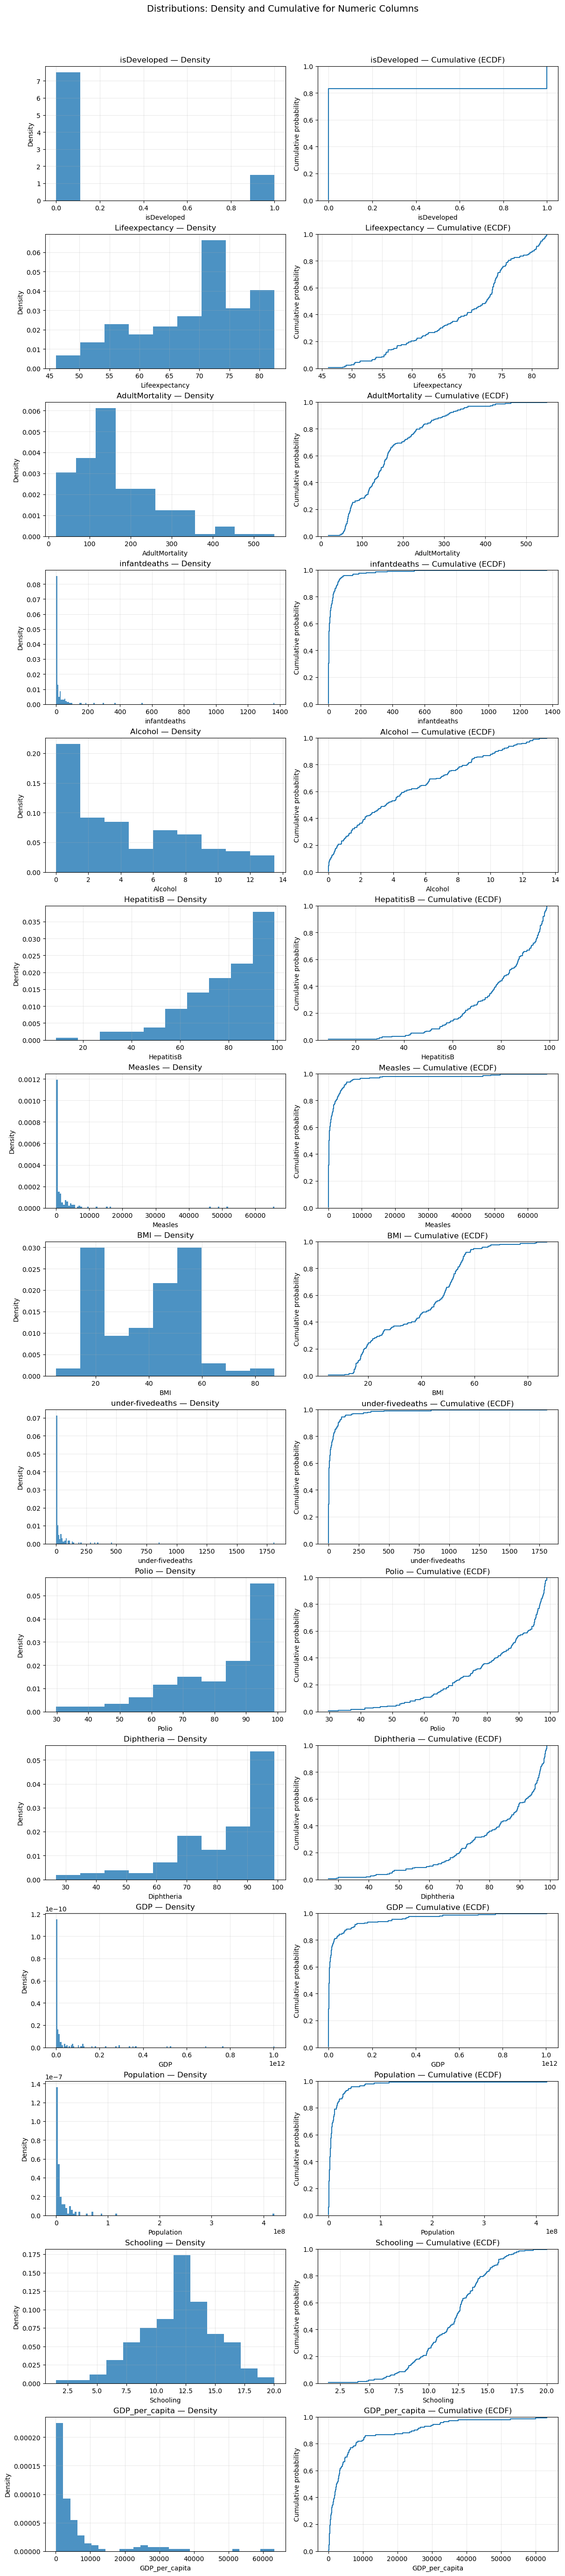

In [17]:
# Print all distributions

df = dfLE.copy()

# --- Pick numeric columns only (drop duplicate column names to avoid returning DataFrames) ---
num_cols = df.select_dtypes(include=np.number).columns.drop_duplicates().tolist()
if not num_cols:
    raise ValueError("No numeric columns found.")

# --- Small helper: empirical CDF (ECDF) ---
def ecdf(x: np.ndarray):
    x = np.sort(x)
    y = np.arange(1, x.size + 1) / x.size
    return x, y

# --- Figure layout: one row per variable, two plots (density + cumulative) ---
n = len(num_cols)
fig, axes = plt.subplots(
    nrows=n, ncols=2, figsize=(12, 3.6*n), constrained_layout=True, sharex=False
)

# If there’s only one numeric col, axes comes back as 1D; normalize it
if n == 1:
    axes = np.array([axes])

for i, col in enumerate(num_cols):
    # Safely get the Series even if duplicate column names sneak in
    col_data = df[col]
    if isinstance(col_data, pd.DataFrame):
        # pick the first column with that name
        col_data = col_data.iloc[:, 0]

    x = pd.to_numeric(col_data, errors="coerce").dropna().values

    # Skip empty or constant arrays
    if x.size < 2 or np.all(x == x[0]):
        for j in range(2):
            axes[i, j].axis("off")
        axes[i, 0].set_title(f"{col} (insufficient variation)")
        continue

    # -------- Density (left) --------
    ax = axes[i, 0]
    ax.hist(x, bins="auto", density=True, alpha=0.8)
    ax.set_title(f"{col} — Density")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.grid(True, alpha=0.25)

    # Optional: uncomment for a quick log-x option when data are very skewed
    # ax.set_xscale("log")

    # -------- Cumulative / ECDF (right) --------
    ax = axes[i, 1]
    xs, ys = ecdf(x)
    ax.plot(xs, ys, drawstyle="steps-post")
    ax.set_title(f"{col} — Cumulative (ECDF)")
    ax.set_xlabel(col)
    ax.set_ylabel("Cumulative probability")
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.25)

fig.suptitle("Distributions: Density and Cumulative for Numeric Columns", y=1.02, fontsize=14)
# Save if you want to submit the figure:
# fig.savefig("led_distributions.png", dpi=200, bbox_inches="tight")
plt.show()


### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

Mean (μ): 12.03
Standard Deviation (σ): 3.10


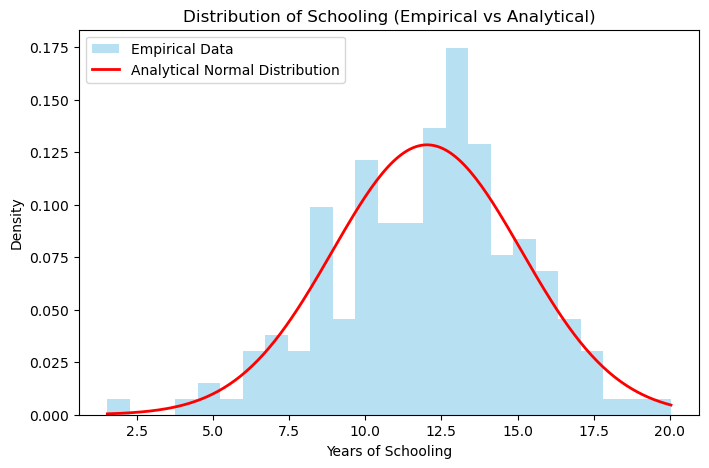

In [16]:
#Analytical for Schooling

# Drop NaN values from Schooling
schooling = df['Schooling'].dropna()

# Compute parameters manually (no .fit())
mu = schooling.mean()
sigma = schooling.std()

print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

# Create a range of x values
x = np.linspace(schooling.min(), schooling.max(), 200)

# Analytical normal distribution (pdf)
y = norm.pdf(x, mu, sigma)

# --- Visualization ---
plt.figure(figsize=(8,5))
plt.hist(schooling, bins=25, density=True, alpha=0.6, color='skyblue', label='Empirical Data')
plt.plot(x, y, color='red', lw=2, label='Analytical Normal Distribution')

plt.title("Distribution of Schooling (Empirical vs Analytical)")
plt.xlabel("Years of Schooling")
plt.ylabel("Density")
plt.legend()
plt.show()


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

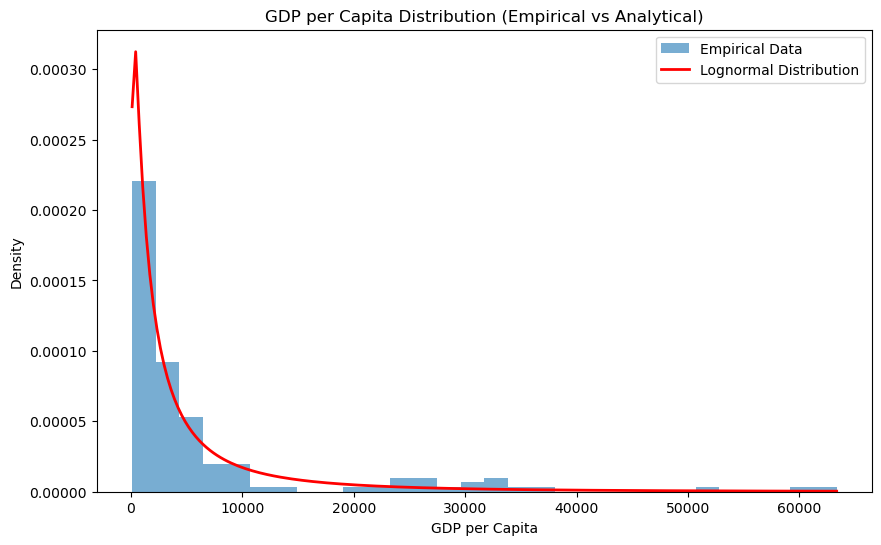

Empirical mean: 6886.72
Analytical mean (Lognormal): 7226.95


In [18]:
# Analytical for GDP per capita using a log-normal distribution

# Compute parameters manually (no .fit())
mu = np.log(data).mean()
sigma = np.log(data).std()

# Create lognormal distribution
x = np.linspace(data.min(), data.max(), 200)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Plot empirical vs analytical
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Empirical Data')
plt.plot(x, pdf, 'r-', lw=2, label='Lognormal Distribution')
plt.title('GDP per Capita Distribution (Empirical vs Analytical)')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.legend()
plt.show()

# Evaluate: e.g., compare mean/median/skew
print(f"Empirical mean: {data.mean():.2f}")
print(f"Analytical mean (Lognormal): {np.exp(mu + sigma**2 / 2):.2f}")


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

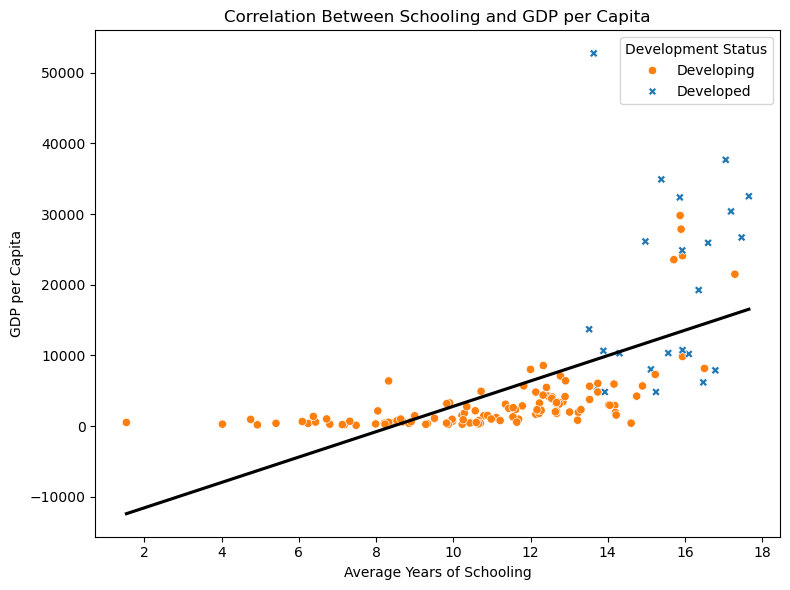

In [7]:
# Visualize correlations.

filtered = dfLE.dropna(subset=['GDP_per_capita', 'Schooling']).copy()
filtered = filtered[(filtered['GDP_per_capita'] < filtered['GDP_per_capita'].quantile(0.99)) &
                    (filtered['Schooling'] < filtered['Schooling'].quantile(0.99))]

# Create a readable development-status label for plotting (isDeveloped is 1/0 in dfLE)
filtered['DevelopmentStatus'] = filtered['isDeveloped'].map({1.0: 'Developed', 0.0: 'Developing'})

# Scatterplot with regression line (overall). For group-specific regressions, call regplot per group.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=filtered,
    x='Schooling',
    y='GDP_per_capita',
    hue='DevelopmentStatus',
    style='DevelopmentStatus',
    palette={'Developed': 'tab:blue', 'Developing': 'tab:orange'}
)
sns.regplot(
    data=filtered,
    x='Schooling',
    y='GDP_per_capita',
    scatter=False,
    ci=None,
    color='black'
)
plt.title('Correlation Between Schooling and GDP per Capita')
plt.xlabel('Average Years of Schooling')
plt.ylabel('GDP per Capita')
plt.legend(title='Development Status')
plt.tight_layout()
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

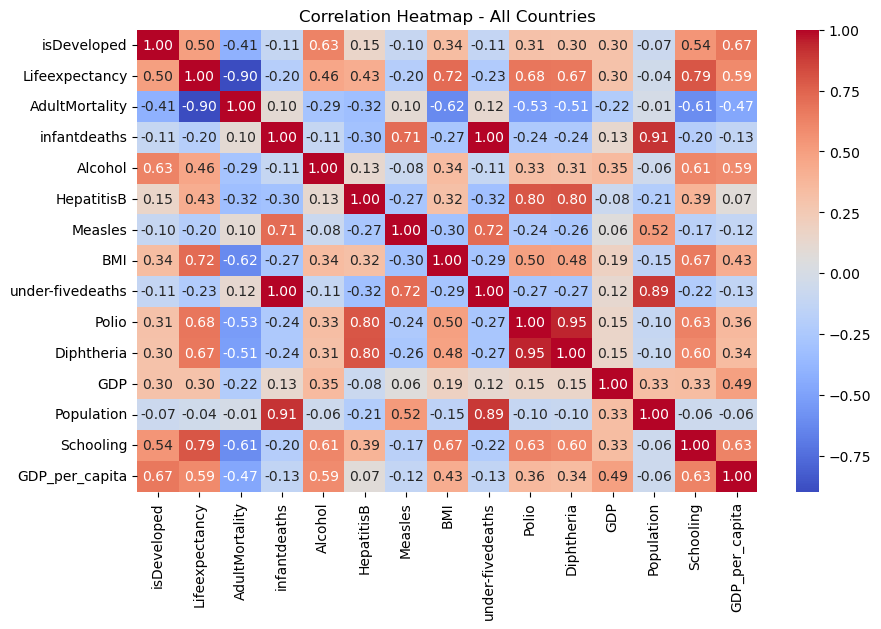

In [8]:
#Calculate correlations and analyze. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(dfLE.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - All Countries")
plt.show()
